# Import libraries 

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import data and exploration of dataset

In [314]:
pd.set_option('display.float_format','{:.2f}'.format) 
train_df = pd.read_csv('train_set.csv')
train_df.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,97674063206.00,134520.00,70.00,2.00,1199.00,77.00,4.00,861.00,17.55,81.64,18.00,0
1,97688892034.00,133876.00,67.00,3.00,12585.00,90.00,4.00,4371.00,17.38,189.38,28.00,4
2,98115438910.00,133732.00,39.00,3.00,23491.00,83.00,3.00,1005.00,16.44,57.63,27.00,44
3,98242792374.00,43772.00,59.00,8.00,3291.00,73.00,2.00,3084.00,7.00,72.16,2.00,4
4,98334382194.00,50532.00,66.00,1.00,288.00,80.00,0.00,603.00,12.56,173.25,0.00,10


In [315]:
pd.set_option('display.float_format','{:.2f}'.format) 
test_df = pd.read_csv('test_set.csv')
test_df.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
0,14942256073,122750.00,58.00,2.00,11503.00,89.00,0.00,168.00,13.50,90.19,32.00
1,16036037903,28134.00,68.00,4.00,938.00,81.00,5.00,735.00,13.67,98.27,19.00
2,288585940112,30578.00,19.00,0.00,38982.00,nan,0.00,0.00,20.46,48.77,0.00
3,129041645070,54398.00,47.00,0.00,1683.00,80.00,0.00,69.00,15.00,72.32,0.00
4,12460296563,63890.00,59.00,3.00,1299.00,80.00,3.00,1470.00,10.00,24.54,19.00


In [316]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396487 entries, 0 to 396486
Data columns (total 12 columns):
hotel_id              396487 non-null float64
city_id               395979 non-null float64
content_score         395979 non-null float64
n_images              395978 non-null float64
distance_to_center    395958 non-null float64
avg_rating            286089 non-null float64
stars                 395925 non-null float64
n_reviews             395958 non-null float64
avg_rank              396487 non-null float64
avg_price             396317 non-null float64
avg_saving_percent    396317 non-null float64
n_clicks              396487 non-null int64
dtypes: float64(11), int64(1)
memory usage: 36.3 MB


In [317]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132162 entries, 0 to 132161
Data columns (total 11 columns):
hotel_id              132162 non-null int64
city_id               132007 non-null float64
content_score         132007 non-null float64
n_images              132006 non-null float64
distance_to_center    131999 non-null float64
avg_rating            95532 non-null float64
stars                 131987 non-null float64
n_reviews             131999 non-null float64
avg_rank              132162 non-null float64
avg_price             132104 non-null float64
avg_saving_percent    132104 non-null float64
dtypes: float64(10), int64(1)
memory usage: 11.1 MB


In [318]:
train_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,396487.00,395979.00,395979.00,395978.00,395958.00,286089.00,395925.00,395958.00,396487.00,396317.00,396317.00,396487.00
mean,132630362060.33,149193.47,50.99,259.32,16343.83,81.62,1.16,913.67,14.69,109.33,7.18,13.78
std,103372222697.03,219189.29,11.56,17316.82,275219.96,6.03,1.62,2432.49,5.60,148.20,13.08,123.57
min,155796153.00,2.00,7.00,-1.00,0.00,34.00,0.00,0.00,1.00,4.00,0.00,0.00
25%,40622546257.00,32014.00,45.00,0.00,544.00,79.00,0.00,0.00,11.09,51.05,0.00,0.00
50%,108727957584.00,55122.00,53.00,1.00,1516.00,83.00,0.00,189.00,15.00,77.65,0.00,0.00
75%,228193513137.00,137464.00,59.00,2.00,4163.00,86.00,3.00,777.00,18.38,120.93,10.00,2.00
max,323711383754.00,878736.00,81.00,2393911.00,18341550.00,97.00,5.00,283089.00,100.00,8000.00,99.00,13742.00


In [267]:
test_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
count,132162.00,132007.00,132007.00,132006.00,131999.00,95532.00,131987.00,131999.00,132162.00,132104.00,132104.00
mean,132781116575.77,149248.66,50.95,357.09,15525.16,81.62,1.16,901.24,14.71,108.72,7.12
std,103565398763.98,219593.13,11.60,20952.40,249518.99,6.02,1.62,2515.97,5.66,144.89,12.98
min,155889612.00,1354.00,7.00,-1.00,0.00,43.00,0.00,0.00,1.00,4.00,0.00
25%,40824604615.00,31986.00,45.00,0.00,542.00,79.00,0.00,0.00,11.04,50.81,0.00
50%,108221783640.00,55118.00,53.00,1.00,1514.00,83.00,0.00,186.00,15.00,77.48,0.00
75%,228844704296.00,137444.00,59.00,2.00,4158.00,86.00,3.00,759.00,18.43,121.01,9.00
max,323387267942.00,878696.00,80.00,2628317.00,16035767.00,98.00,5.00,254859.00,99.00,7938.77,100.00


In [268]:
train_df.corr(method='pearson')

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
hotel_id,1.00,0.05,-0.71,-0.01,0.04,0.27,-0.57,-0.33,0.16,0.13,-0.39,-0.10
city_id,0.05,1.00,-0.04,-0.00,0.02,0.04,-0.04,-0.09,-0.03,-0.05,-0.06,-0.04
content_score,-0.71,-0.04,1.00,0.01,-0.11,-0.14,0.54,0.29,-0.14,-0.07,0.39,0.10
n_images,-0.01,-0.00,0.01,1.00,-0.00,-0.00,0.01,0.02,-0.00,-0.00,0.00,0.00
distance_to_center,0.04,0.02,-0.11,-0.00,1.00,0.01,-0.02,-0.02,-0.00,0.01,-0.01,-0.00
avg_rating,0.27,0.04,-0.14,-0.00,0.01,1.00,-0.08,-0.07,0.01,0.21,-0.15,0.01
stars,-0.57,-0.04,0.54,0.01,-0.02,-0.08,1.00,0.35,-0.17,-0.01,0.47,0.13
n_reviews,-0.33,-0.09,0.29,0.02,-0.02,-0.07,0.35,1.00,-0.11,-0.00,0.37,0.22
avg_rank,0.16,-0.03,-0.14,-0.00,-0.00,0.01,-0.17,-0.11,1.00,0.02,-0.12,-0.08
avg_price,0.13,-0.05,-0.07,-0.00,0.01,0.21,-0.01,-0.00,0.02,1.00,-0.03,0.02


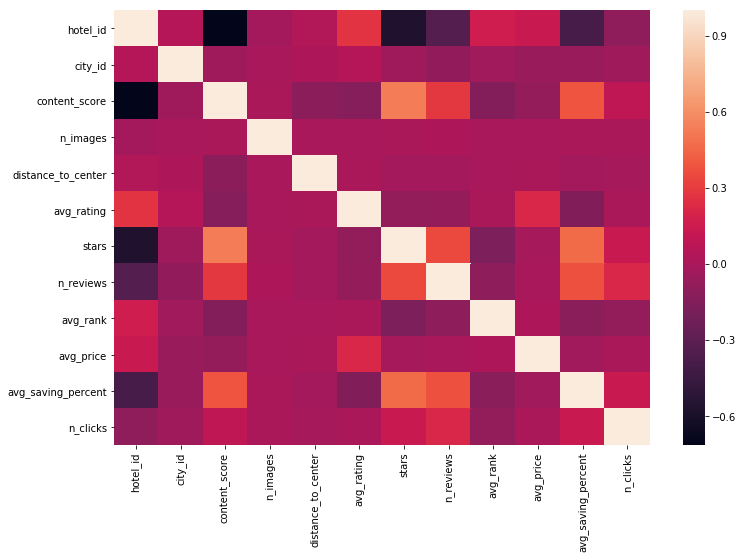

In [269]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
sns.heatmap(train_df.corr(method='pearson'), ax=ax1)

In [270]:
train_df.corr(method='spearman')

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
hotel_id,1.00,0.07,-0.75,-0.68,-0.02,0.26,-0.61,-0.73,0.18,0.05,-0.53,-0.35
city_id,0.07,1.00,-0.01,-0.07,-0.01,0.01,-0.03,-0.10,-0.03,-0.19,-0.04,-0.19
content_score,-0.75,-0.01,1.00,0.68,0.03,-0.12,0.64,0.68,-0.18,-0.01,0.57,0.34
n_images,-0.68,-0.07,0.68,1.00,-0.01,-0.10,0.55,0.62,-0.15,0.02,0.49,0.36
distance_to_center,-0.02,-0.01,0.03,-0.01,1.00,-0.06,0.05,0.02,-0.01,-0.05,0.09,-0.05
avg_rating,0.26,0.01,-0.12,-0.10,-0.06,1.00,-0.09,-0.06,0.00,0.30,-0.17,-0.02
stars,-0.61,-0.03,0.64,0.55,0.05,-0.09,1.00,0.57,-0.18,0.06,0.54,0.32
n_reviews,-0.73,-0.10,0.68,0.62,0.02,-0.06,0.57,1.00,-0.20,0.01,0.58,0.39
avg_rank,0.18,-0.03,-0.18,-0.15,-0.01,0.00,-0.18,-0.20,1.00,0.00,-0.18,-0.27
avg_price,0.05,-0.19,-0.01,0.02,-0.05,0.30,0.06,0.01,0.00,1.00,0.02,0.09


### Exploring the data for which 'n_clicks' is non-zero

In [319]:
nonzero_df = train_df[train_df['n_clicks']>0]
nonzero_df.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
1,97688892034.00,133876.00,67.00,3.00,12585.00,90.00,4.00,4371.00,17.38,189.38,28.00,4
2,98115438910.00,133732.00,39.00,3.00,23491.00,83.00,3.00,1005.00,16.44,57.63,27.00,44
3,98242792374.00,43772.00,59.00,8.00,3291.00,73.00,2.00,3084.00,7.00,72.16,2.00,4
4,98334382194.00,50532.00,66.00,1.00,288.00,80.00,0.00,603.00,12.56,173.25,0.00,10
6,98529773810.00,63296.00,56.00,2.00,391.00,87.00,0.00,198.00,20.45,99.41,8.00,2


In [272]:
nonzero_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,137121.00,136930.00,136930.00,136930.00,136924.00,119052.00,136915.00,136924.00,137121.00,137121.00,137121.00,137121.00
mean,89026887238.94,115888.69,55.28,293.21,10226.78,81.49,1.79,1697.16,12.79,105.93,11.91,39.85
std,90732732909.79,188389.29,9.86,18008.33,206262.35,6.16,1.79,3629.84,4.56,110.81,15.48,207.64
min,155796153.00,1370.00,7.00,-1.00,0.00,34.00,0.00,0.00,1.00,4.02,0.00,2.00
25%,9153436766.00,29918.00,51.00,0.00,535.00,78.00,0.00,141.00,10.00,57.46,0.00,2.00
50%,58907363465.00,52306.00,58.00,2.00,1352.00,82.00,2.00,552.00,13.40,82.32,5.00,4.00
75%,138746739160.00,130612.00,61.00,3.00,3541.00,86.00,3.00,1836.00,16.00,121.19,20.00,16.00
max,323292064374.00,878696.00,81.00,1844979.00,18341550.00,97.00,5.00,283089.00,87.00,6939.29,99.00,13742.00


In [273]:
nonzero_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137121 entries, 1 to 396486
Data columns (total 12 columns):
hotel_id              137121 non-null float64
city_id               136930 non-null float64
content_score         136930 non-null float64
n_images              136930 non-null float64
distance_to_center    136924 non-null float64
avg_rating            119052 non-null float64
stars                 136915 non-null float64
n_reviews             136924 non-null float64
avg_rank              137121 non-null float64
avg_price             137121 non-null float64
avg_saving_percent    137121 non-null float64
n_clicks              137121 non-null int64
dtypes: float64(11), int64(1)
memory usage: 13.6 MB


In [274]:
nonzero_df.corr(method='pearson')

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
hotel_id,1.00,0.07,-0.70,-0.01,0.04,0.21,-0.53,-0.30,0.05,0.03,-0.35,-0.10
city_id,0.07,1.00,-0.03,-0.00,0.02,0.05,-0.04,-0.10,-0.09,-0.04,-0.04,-0.05
content_score,-0.70,-0.03,1.00,0.01,-0.11,-0.06,0.56,0.28,-0.06,0.02,0.41,0.11
n_images,-0.01,-0.00,0.01,1.00,-0.00,0.00,0.01,0.01,0.00,-0.00,0.00,0.00
distance_to_center,0.04,0.02,-0.11,-0.00,1.00,0.00,-0.02,-0.01,-0.01,0.00,-0.01,-0.01
avg_rating,0.21,0.05,-0.06,0.00,0.00,1.00,0.01,-0.05,-0.02,0.23,-0.12,0.01
stars,-0.53,-0.04,0.56,0.01,-0.02,0.01,1.00,0.30,-0.11,0.12,0.47,0.14
n_reviews,-0.30,-0.10,0.28,0.01,-0.01,-0.05,0.30,1.00,-0.05,0.05,0.35,0.21
avg_rank,0.05,-0.09,-0.06,0.00,-0.01,-0.02,-0.11,-0.05,1.00,0.00,-0.05,-0.09
avg_price,0.03,-0.04,0.02,-0.00,0.00,0.23,0.12,0.05,0.00,1.00,0.05,0.04


In [275]:
nonzero_df.corr(method='spearman')

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
hotel_id,1.00,0.12,-0.64,-0.66,0.02,0.21,-0.55,-0.67,0.07,-0.14,-0.47,-0.34
city_id,0.12,1.00,0.02,-0.08,-0.01,0.07,0.01,-0.11,-0.12,-0.09,0.01,-0.22
content_score,-0.64,0.02,1.00,0.66,0.02,-0.03,0.64,0.62,-0.10,0.15,0.57,0.33
n_images,-0.66,-0.08,0.66,1.00,-0.01,-0.06,0.52,0.61,-0.05,0.16,0.49,0.35
distance_to_center,0.02,-0.01,0.02,-0.01,1.00,-0.07,0.05,0.03,-0.02,-0.04,0.11,-0.02
avg_rating,0.21,0.07,-0.03,-0.06,-0.07,1.00,0.03,-0.06,-0.02,0.28,-0.12,-0.03
stars,-0.55,0.01,0.64,0.52,0.05,0.03,1.00,0.54,-0.13,0.25,0.53,0.32
n_reviews,-0.67,-0.11,0.62,0.61,0.03,-0.06,0.54,1.00,-0.09,0.17,0.59,0.39
avg_rank,0.07,-0.12,-0.10,-0.05,-0.02,-0.02,-0.13,-0.09,1.00,0.01,-0.09,-0.12
avg_price,-0.14,-0.09,0.15,0.16,-0.04,0.28,0.25,0.17,0.01,1.00,0.14,0.18


# Handle missing values

In [320]:
train_df.isna().sum()

hotel_id                   0
city_id                  508
content_score            508
n_images                 509
distance_to_center       529
avg_rating            110398
stars                    562
n_reviews                529
avg_rank                   0
avg_price                170
avg_saving_percent       170
n_clicks                   0
dtype: int64

In [321]:
test_df.isna().sum()

hotel_id                  0
city_id                 155
content_score           155
n_images                156
distance_to_center      163
avg_rating            36630
stars                   175
n_reviews               163
avg_rank                  0
avg_price                58
avg_saving_percent       58
dtype: int64

In [322]:
train_df2 = train_df.copy()
train_df2.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,97674063206.00,134520.00,70.00,2.00,1199.00,77.00,4.00,861.00,17.55,81.64,18.00,0
1,97688892034.00,133876.00,67.00,3.00,12585.00,90.00,4.00,4371.00,17.38,189.38,28.00,4
2,98115438910.00,133732.00,39.00,3.00,23491.00,83.00,3.00,1005.00,16.44,57.63,27.00,44
3,98242792374.00,43772.00,59.00,8.00,3291.00,73.00,2.00,3084.00,7.00,72.16,2.00,4
4,98334382194.00,50532.00,66.00,1.00,288.00,80.00,0.00,603.00,12.56,173.25,0.00,10


In [323]:
test_df2 = test_df.copy()
test_df2.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
0,14942256073,122750.00,58.00,2.00,11503.00,89.00,0.00,168.00,13.50,90.19,32.00
1,16036037903,28134.00,68.00,4.00,938.00,81.00,5.00,735.00,13.67,98.27,19.00
2,288585940112,30578.00,19.00,0.00,38982.00,nan,0.00,0.00,20.46,48.77,0.00
3,129041645070,54398.00,47.00,0.00,1683.00,80.00,0.00,69.00,15.00,72.32,0.00
4,12460296563,63890.00,59.00,3.00,1299.00,80.00,3.00,1470.00,10.00,24.54,19.00


### Column - 'avg_rating' is dropped because it has a large number of missing values and also it doesn't have signigicant correlation with the target variable.

In [324]:
train_df2 = train_df2.drop('avg_rating', axis=1)

In [325]:
test_df2 = test_df2.drop('avg_rating', axis=1)

### Rows that has two or more missing values are dropped. Only a few records are dropped based on this condition, so there is not much loss of information.  

In [326]:
train_df2 = train_df2.dropna(thresh=9)
train_df2.isna().sum()

hotel_id                0
city_id                 0
content_score           0
n_images                0
distance_to_center      0
stars                  33
n_reviews               0
avg_rank                0
avg_price             165
avg_saving_percent    165
n_clicks                0
dtype: int64

In [327]:
test_df2 = test_df2.dropna(thresh=8)
test_df2.isna().sum()

hotel_id               0
city_id                0
content_score          0
n_images               0
distance_to_center     0
stars                 12
n_reviews              0
avg_rank               0
avg_price             58
avg_saving_percent    58
dtype: int64

In [287]:
train_df2['stars'].value_counts()

0.00    251082
3.00     65848
4.00     40635
2.00     24726
5.00      8992
1.00      4642
Name: stars, dtype: int64

### For the remaining columns - 'stars', 'avg_price', 'avg_saving_percent'
### They are replaced with mode or meadian values (median is preferred over mean as there are extreme values)
### These values can also be estimated by doing regression with correlated columns but considering that there are only few rows, simple way of imputation is done 

In [328]:
train_df2['stars'].fillna(train_df2['stars'].mode()[0], inplace=True)

In [329]:
train_df2['avg_price'].fillna(train_df2['avg_price'].median(), inplace=True)
train_df2['avg_saving_percent'].fillna(train_df2['avg_saving_percent'].median(), inplace=True)

In [330]:
test_df2['stars'].fillna(test_df2['stars'].mode()[0], inplace=True)
test_df2['avg_price'].fillna(test_df2['avg_price'].median(), inplace=True)
test_df2['avg_saving_percent'].fillna(test_df2['avg_saving_percent'].median(), inplace=True)

### Now all the missing values are handled 

In [331]:
train_df2.isna().sum()

hotel_id              0
city_id               0
content_score         0
n_images              0
distance_to_center    0
stars                 0
n_reviews             0
avg_rank              0
avg_price             0
avg_saving_percent    0
n_clicks              0
dtype: int64

In [332]:
test_df2.isna().sum()

hotel_id              0
city_id               0
content_score         0
n_images              0
distance_to_center    0
stars                 0
n_reviews             0
avg_rank              0
avg_price             0
avg_saving_percent    0
dtype: int64

In [346]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395958 entries, 0 to 396473
Data columns (total 11 columns):
hotel_id              395958 non-null float64
city_id               395958 non-null float64
content_score         395958 non-null float64
n_images              395958 non-null float64
distance_to_center    395958 non-null float64
stars                 395958 non-null float64
n_reviews             395958 non-null float64
avg_rank              395958 non-null float64
avg_price             395958 non-null float64
avg_saving_percent    395958 non-null float64
n_clicks              395958 non-null int64
dtypes: float64(10), int64(1)
memory usage: 36.3 MB


# Outliers treatment

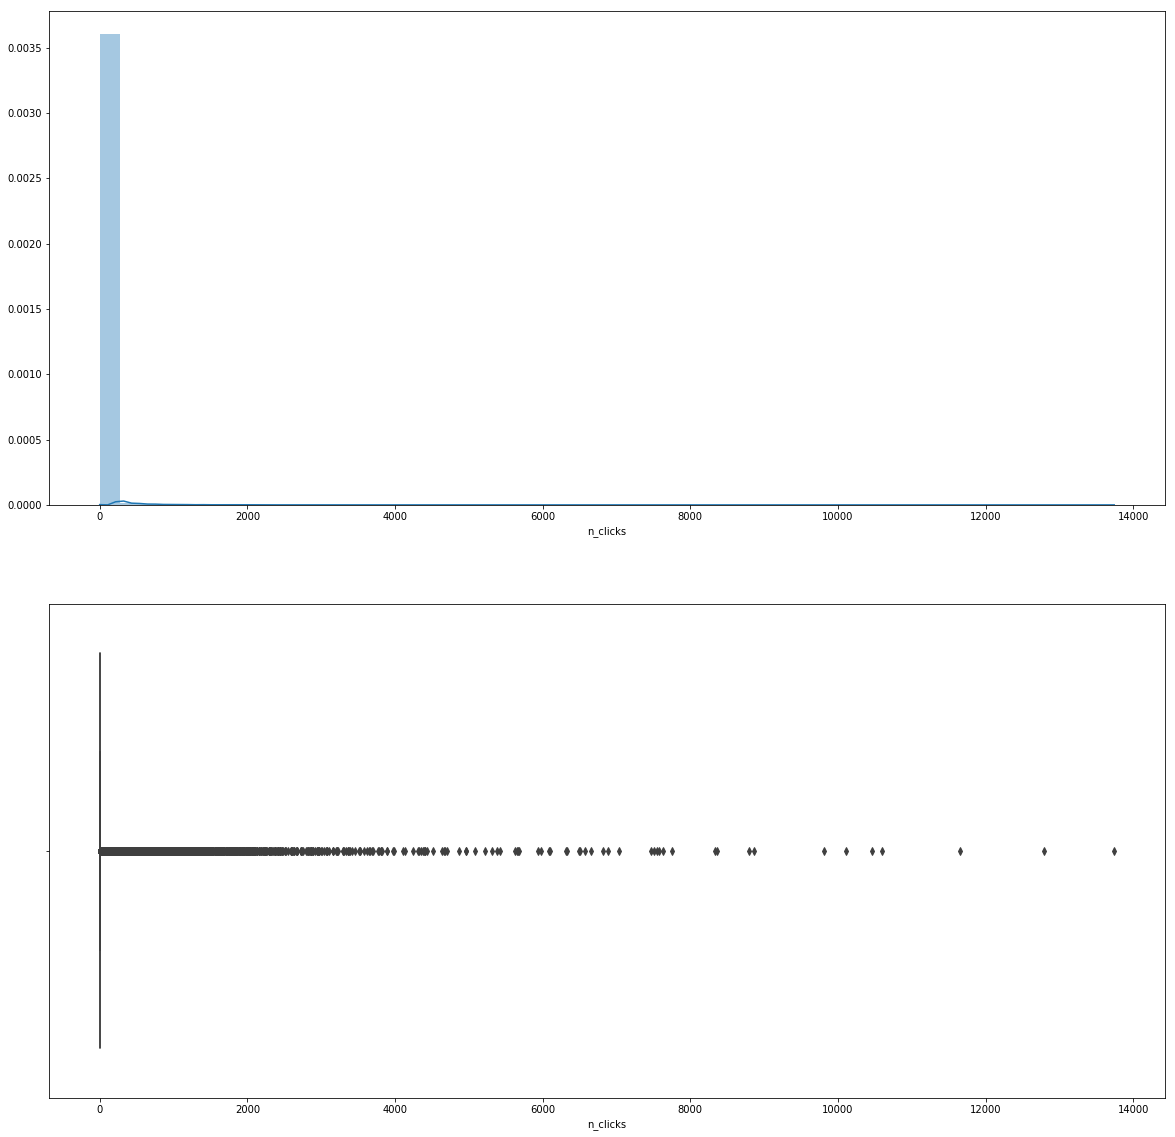

In [334]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
sns.distplot(train_df2['n_clicks'], ax=ax1)
ax2 = fig.add_subplot(212)
sns.boxplot(train_df2['n_clicks'], ax=ax2)
plt.show()

In [335]:
train_df3 = train_df2.copy()
train_df3.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,97674063206.00,134520.00,70.00,2.00,1199.00,4.00,861.00,17.55,81.64,18.00,0
1,97688892034.00,133876.00,67.00,3.00,12585.00,4.00,4371.00,17.38,189.38,28.00,4
2,98115438910.00,133732.00,39.00,3.00,23491.00,3.00,1005.00,16.44,57.63,27.00,44
3,98242792374.00,43772.00,59.00,8.00,3291.00,2.00,3084.00,7.00,72.16,2.00,4
4,98334382194.00,50532.00,66.00,1.00,288.00,0.00,603.00,12.56,173.25,0.00,10


In [336]:
test_df3 = test_df2.copy()
test_df3.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
0,14942256073,122750.00,58.00,2.00,11503.00,0.00,168.00,13.50,90.19,32.00
1,16036037903,28134.00,68.00,4.00,938.00,5.00,735.00,13.67,98.27,19.00
2,288585940112,30578.00,19.00,0.00,38982.00,0.00,0.00,20.46,48.77,0.00
3,129041645070,54398.00,47.00,0.00,1683.00,0.00,69.00,15.00,72.32,0.00
4,12460296563,63890.00,59.00,3.00,1299.00,3.00,1470.00,10.00,24.54,19.00


### Column - 'n_images' has some rows that has negative values i.e. -1
### Since it is not possible for 'n_images' to be negative, it can be assumed that these are nonsensical values and can be replaced by 0

In [337]:
len(train_df3[train_df3['n_images']<0])

3361

In [338]:
train_df3.loc[train_df3['n_images'] < 0, 'n_images'] = 0
test_df3.loc[test_df3['n_images'] < 0, 'n_images'] = 0

### To treat outliers, outliers are removed based on percentile values
### These percentile values are arrived after some experimentation 
### Outliers treatment for 'distance_to_center' and 'avg_price' is not done as these features are not going to be used as predictors in the model 

In [339]:
train_df3 = train_df3[(train_df3.n_images < train_df3.n_images.quantile(.99)) & (train_df3.n_reviews < train_df3.n_reviews.quantile(.99)) & (train_df3.n_reviews < train_df3.n_reviews.quantile(.99))
                         & (train_df3.n_clicks < train_df3.n_clicks.quantile(.99))]
train_df3.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00
mean,135815184851.30,151347.09,50.65,1.19,16738.67,1.10,710.46,14.77,108.86,6.69,5.50
std,103010754356.87,220684.25,11.54,1.63,279362.95,1.59,1356.49,5.63,149.62,12.67,20.55
min,156014224.00,2.00,7.00,0.00,0.00,0.00,0.00,1.00,4.00,0.00,0.00
25%,43234320318.00,32350.00,44.00,0.00,541.00,0.00,0.00,11.20,50.40,0.00,0.00
50%,118987980063.00,59980.00,53.00,1.00,1519.00,0.00,174.00,15.02,76.85,0.00,0.00
75%,235650123875.50,137626.00,59.00,2.00,4185.00,3.00,696.00,18.50,119.92,9.00,2.00
max,323711383754.00,878736.00,81.00,8.00,18341550.00,5.00,10062.00,100.00,8000.00,99.00,254.00


In [340]:
test_df3 = test_df3[(test_df3.n_images < test_df3.n_images.quantile(.99)) & (test_df3.n_reviews < test_df3.n_reviews.quantile(.99)) & (test_df3.n_reviews < test_df3.n_reviews.quantile(.99))]
test_df3.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
count,129006.00,129006.00,129006.00,129006.00,129006.00,129006.00,129006.00,129006.00,129006.00,129006.00
mean,135304766984.34,150745.88,50.69,1.20,15782.82,1.11,721.66,14.75,108.49,6.74
std,103276268682.26,220787.86,11.58,1.64,252172.41,1.60,1376.48,5.69,146.16,12.65
min,155889612.00,1354.00,7.00,0.00,0.00,0.00,0.00,1.00,4.00,0.00
25%,42775086156.75,32184.00,44.00,0.00,539.00,0.00,0.00,11.07,50.40,0.00
50%,118098748831.00,55894.00,53.00,1.00,1517.00,0.00,177.00,15.00,76.94,0.00
75%,238932294920.00,137535.00,59.00,2.00,4173.00,3.00,696.00,18.50,120.32,9.00
max,323387267942.00,878696.00,80.00,8.00,16035767.00,5.00,9918.00,99.00,7938.77,100.00


### For the target variable - 'n_clicks', in addition to removed by 99 perntile of values it is roughly limited to 98 percentile value
### As stated above this process of outliers treatment is arrived after some experimentation

In [347]:
train_df3['n_clicks'] = train_df3['n_clicks'].clip(0, 120)
train_df3.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00,384142.00
mean,135815184851.30,151347.09,50.65,1.19,16738.67,1.10,710.46,14.77,108.86,6.69,5.02
std,103010754356.87,220684.25,11.54,1.63,279362.95,1.59,1356.49,5.63,149.62,12.67,16.53
min,156014224.00,2.00,7.00,0.00,0.00,0.00,0.00,1.00,4.00,0.00,0.00
25%,43234320318.00,32350.00,44.00,0.00,541.00,0.00,0.00,11.20,50.40,0.00,0.00
50%,118987980063.00,59980.00,53.00,1.00,1519.00,0.00,174.00,15.02,76.85,0.00,0.00
75%,235650123875.50,137626.00,59.00,2.00,4185.00,3.00,696.00,18.50,119.92,9.00,2.00
max,323711383754.00,878736.00,81.00,8.00,18341550.00,5.00,10062.00,100.00,8000.00,99.00,120.00


## Transformation methods such as log transformation or scalar transformation are not applied as it results in negative values 

In [348]:
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384142 entries, 0 to 396473
Data columns (total 11 columns):
hotel_id              384142 non-null float64
city_id               384142 non-null float64
content_score         384142 non-null float64
n_images              384142 non-null float64
distance_to_center    384142 non-null float64
stars                 384142 non-null float64
n_reviews             384142 non-null float64
avg_rank              384142 non-null float64
avg_price             384142 non-null float64
avg_saving_percent    384142 non-null float64
n_clicks              384142 non-null int64
dtypes: float64(10), int64(1)
memory usage: 35.2 MB


In [360]:
test_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129006 entries, 0 to 132161
Data columns (total 10 columns):
hotel_id              129006 non-null int64
city_id               129006 non-null float64
content_score         129006 non-null float64
n_images              129006 non-null float64
distance_to_center    129006 non-null float64
stars                 129006 non-null float64
n_reviews             129006 non-null float64
avg_rank              129006 non-null float64
avg_price             129006 non-null float64
avg_saving_percent    129006 non-null float64
dtypes: float64(9), int64(1)
memory usage: 10.8 MB


### Check for correlation after outliers treatment 

In [349]:
train_df3.corr(method='pearson')

,hotel_id,city_id,content_score,n_images,distance_to_center,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
hotel_id,1.00,0.04,-0.71,-0.56,0.04,-0.56,-0.45,0.15,0.14,-0.38,-0.22
city_id,0.04,1.00,-0.03,-0.06,0.02,-0.03,-0.10,-0.04,-0.05,-0.05,-0.09
content_score,-0.71,-0.03,1.00,0.50,-0.11,0.52,0.38,-0.13,-0.08,0.37,0.20
n_images,-0.56,-0.06,0.50,1.00,-0.03,0.48,0.45,-0.11,-0.04,0.36,0.28
distance_to_center,0.04,0.02,-0.11,-0.03,1.00,-0.02,-0.02,-0.00,0.01,-0.01,-0.01
stars,-0.56,-0.03,0.52,0.48,-0.02,1.00,0.44,-0.16,-0.02,0.45,0.25
n_reviews,-0.45,-0.10,0.38,0.45,-0.02,0.44,1.00,-0.12,-0.03,0.45,0.28
avg_rank,0.15,-0.04,-0.13,-0.11,-0.00,-0.16,-0.12,1.00,0.02,-0.11,-0.13
avg_price,0.14,-0.05,-0.08,-0.04,0.01,-0.02,-0.03,0.02,1.00,-0.04,0.01
avg_saving_percent,-0.38,-0.05,0.37,0.36,-0.01,0.45,0.45,-0.11,-0.04,1.00,0.23


In [350]:
train_df3.corr(method='spearman')

,hotel_id,city_id,content_score,n_images,distance_to_center,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
hotel_id,1.00,0.05,-0.75,-0.66,-0.02,-0.60,-0.72,0.16,0.07,-0.51,-0.32
city_id,0.05,1.00,0.01,-0.05,-0.01,-0.01,-0.07,-0.04,-0.18,-0.02,-0.16
content_score,-0.75,0.01,1.00,0.66,0.04,0.63,0.67,-0.17,-0.03,0.56,0.31
n_images,-0.66,-0.05,0.66,1.00,-0.01,0.53,0.59,-0.14,0.00,0.47,0.32
distance_to_center,-0.02,-0.01,0.04,-0.01,1.00,0.05,0.02,-0.01,-0.05,0.10,-0.05
stars,-0.60,-0.01,0.63,0.53,0.05,1.00,0.55,-0.17,0.03,0.52,0.28
n_reviews,-0.72,-0.07,0.67,0.59,0.02,0.55,1.00,-0.19,-0.01,0.55,0.35
avg_rank,0.16,-0.04,-0.17,-0.14,-0.01,-0.17,-0.19,1.00,0.01,-0.16,-0.26
avg_price,0.07,-0.18,-0.03,0.00,-0.05,0.03,-0.01,0.01,1.00,0.00,0.07
avg_saving_percent,-0.51,-0.02,0.56,0.47,0.10,0.52,0.55,-0.16,0.00,1.00,0.32


### Evaluating dataset using Decision tree and Random forest algorithms to know the features importance

In [351]:
X = train_df3.drop(['hotel_id', 'n_clicks'], axis=1)
y = train_df3.n_clicks

In [352]:
model_features = list(X.columns)

In [353]:
#Decision tree classifier
model1 = DecisionTreeClassifier(max_depth=4) 

In [354]:
model1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [355]:
#Features importance
for feature in zip(model_features, model1.feature_importances_):
    print(feature)

('city_id', 0.12631945263812872)
('content_score', 0.0)
('n_images', 0.06711226294209068)
('distance_to_center', 0.0)
('stars', 0.0)
('n_reviews', 0.30323982200168337)
('avg_rank', 0.45318125587970903)
('avg_price', 0.0)
('avg_saving_percent', 0.05014720653838836)


In [356]:
#Random forest classifier
model2 = RandomForestClassifier(n_estimators=100, max_depth=3)

In [357]:
model2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [358]:
#Features importance
for feature in zip(model_features, model2.feature_importances_):
    print(feature)

('city_id', 0.0487078396752369)
('content_score', 0.03529019445173545)
('n_images', 0.11024111762966161)
('distance_to_center', 0.00040049392647317853)
('stars', 0.039115036127570696)
('n_reviews', 0.22292399967844795)
('avg_rank', 0.344928516567289)
('avg_price', 0.004373045420228716)
('avg_saving_percent', 0.19401975652335657)


### Exporting the dataset

In [359]:
train_df3.to_csv('train_df3.csv')
test_df3.to_csv('test_df3.csv')

### The target variable has zero-inflated and overdispersed count data. To deal with this problem, I chose to apply zero inflated negative binomial regression. This is not available in scikit learn. 
### Although there are other potential libraries in Python, I preferred to do it using R package.
### So I exported the modified dataset to R(RStudio) and built model there. 

### Below I have included the R script that I executed in RStudio

# Import R libraries 

In [ ]:
library(pscl)
library(Metrics)
library(dplyr)
library(tidyverse)
library(stats)

### Import the manipulated dataset from Python into R

In [ ]:
train_df4 <- read.csv("train_df3.csv", stringsAsFactors = FALSE)
View(train_df4)
str(train_df4)
summary(train_df4)

In [ ]:
test_df4 <- read.csv("test_df3.csv", stringsAsFactors = FALSE)

In [ ]:
train_df5 <- train_df4
test_df5 <- test_df4

### Simple inflation model is used - it is a combination of two models
### Count model which in negative binomial regression with log link and binomial model with logit link
### Here, only the important features are used as predictors

In [ ]:
model1 = zeroinfl(n_clicks ~  n_images + n_reviews + avg_rank + avg_saving_percent | 1, 
                  data = train_df5, dist = "negbin", link = "logit")

### Trained model does prediction on test data

In [ ]:
test_df6 <- test_df5[,c("n_images", "n_reviews", "avg_rank", "avg_saving_percent")]
predict <- predict(model1, test_df6)

In [ ]:
predict_df <- data.frame(predict)

### Predicted values are combined with hotel_id and stored as dataframe

In [ ]:
merged_df <- merge(test_df5, predict_df, by=0, all=TRUE)
submission_df <- merged_df[,c("hotel_id", "predict")]

### Export it as csv file for submission

In [ ]:
write.csv(submission_df, 'C:/Users/sibi_submission.csv', row.names = FALSE)